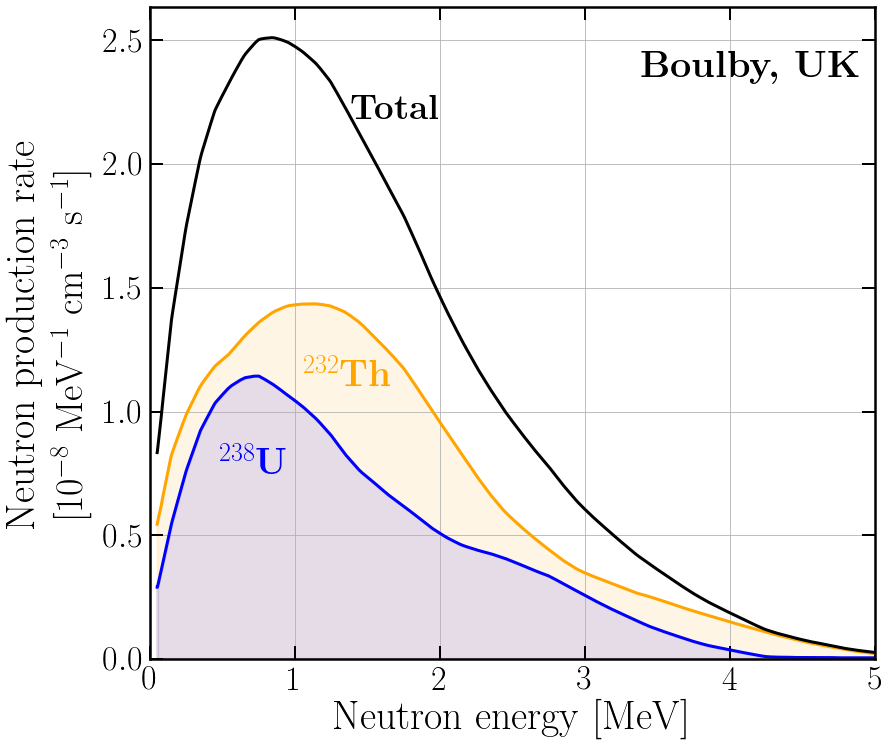

In [6]:
from numpy import *
from matplotlib.pyplot import *
from PlotFuncs import *

fig,ax = MySquarePlot(r'Neutron energy [MeV]','',lfs=40,tfs=34)

rs = 1e8
bw1 = 100.0*1e-3
bw2 = 20.0*1e-3

dat1 = loadtxt('../backgrounds/BoulbyRockNeutrons_Th.txt',delimiter=',')
dat2 = loadtxt('../backgrounds/BoulbyRockNeutrons_U.txt',delimiter=',')


E = linspace(0.05,6.0,10000)
y1 = interp(E,dat1[:,0],dat1[:,1])*((125.0)/10.0)/bw1
y2 = interp(E,dat2[:,0],dat2[:,1])*((70.0)/10.0)/bw1

plt.fill_between(E,rs*y1,y2=0.0,lw=3,color='Orange',alpha=0.1)
plt.plot(E,rs*y1,lw=3,color='Orange')

plt.fill_between(E,rs*y2,y2=0.0,lw=3,color='Blue',alpha=0.1)
plt.plot(E,rs*y2,lw=3,color='Blue')

plt.plot(E,rs*(y1+y2),'k-',lw=3)

#dat1 = loadtxt('../backgrounds/BoulbyRockNeutrons_Tot.txt',delimiter=',')
#plt.plot(dat1[:,0],1e10*dat1[:,1]*2.2,'-',lw=3,color='k')


#y1 = loadtxt('../backgrounds/neutron_spec_500.txt')
#plt.plot(linspace(0.0,10.0,size(y1)),rs*flipud(y1)/bw2,color='k',lw=3)

plt.gcf().text(0.29,0.44,r'$^{232}${\bf Th}',color='Orange',fontsize=37)
plt.gcf().text(0.2,0.34,r'$^{238}${\bf U}',color='Blue',fontsize=37)
plt.gcf().text(0.34,0.75,r'{\bf Total}',color='k',fontsize=35)
plt.gcf().text(0.65,0.8,r'{\bf Boulby, UK}',color='k',fontsize=38)

ax.set_ylabel(r'Neutron production rate',labelpad=60)
plt.gcf().text(0.02,0.3,r'[$10^{-8}$ MeV$^{-1}$ cm$^{-3}$ s$^{-1}$]',fontsize=38,rotation=90)
ax.set_ylim(bottom=0.0)
ax.set_xlim(left=0.0,right=5.0)
ax.grid()
plt.show()

fig.savefig('../plots/BoulbyNeutrons.pdf',bbox_inches='tight')

In [2]:
100+140

240

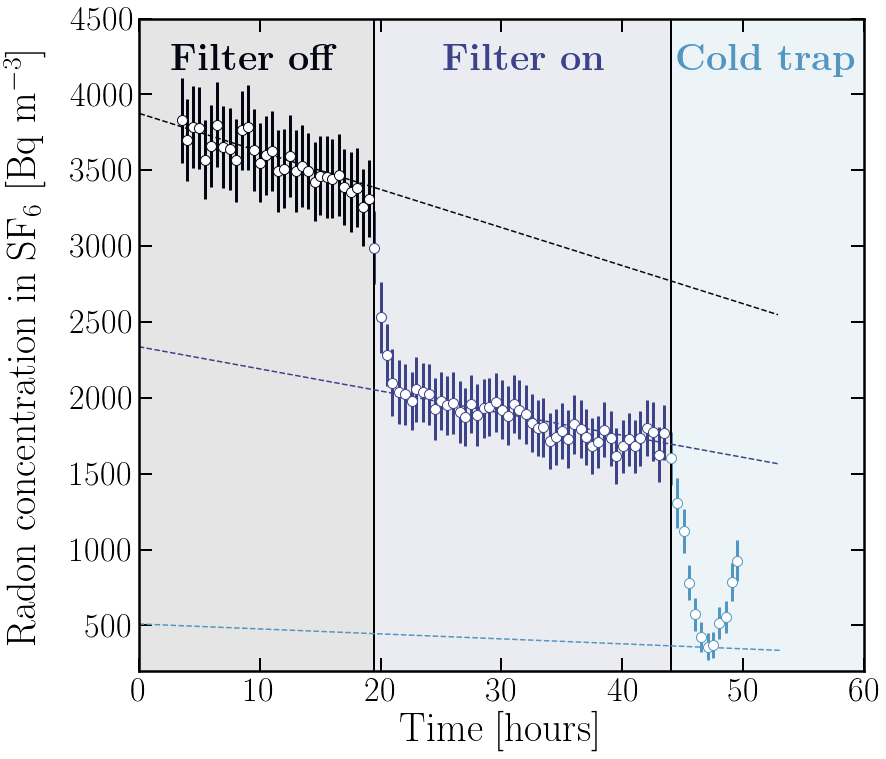

In [8]:
import cmocean

fig,ax = MySquarePlot('Time [hours]','',lfs=40,tfs=34)

dat1 = loadtxt('../backgrounds/RadonFilter_upper.txt',delimiter=',')
dat2 = loadtxt('../backgrounds/RadonFilter_lower.txt',delimiter=',')


col = cmocean.cm.ice(linspace(0,0.6,3))

col1 = col[0,:]
col2 = col[1,:]
col3 = col[2,:]

x = dat1[:,0]
upp = dat1[:,1]
low = dat2[:,1]

yerr = upp-low
y = (upp+low)/2.0

plt.errorbar(x[0:32],y[0:32],yerr[0:32],0,'o',color=col1,markerfacecolor='w',markeredgecolor=col1,markersize=10,lw=3)
plt.errorbar(x[32:81],y[32:81],yerr[32:81],0,'o',color=col2,markerfacecolor='w',markeredgecolor=col2,markersize=10,lw=3)
plt.errorbar(x[81:],y[81:],yerr[81:],0,'o',color=col3,markerfacecolor='w',markeredgecolor=col3,markersize=10,lw=3)

plt.fill_between([0,19.5],[4500,4500],y2=200,color=col1,alpha=0.1)
plt.fill_between([19.5,44],[4500,4500],y2=200,color=col2,alpha=0.1)
plt.fill_between([44,60],[4500,4500],y2=200,color=col3,alpha=0.1)

plt.plot([19.5,19.5],[200,4500],'k-',lw=2)
plt.plot([44,44],[200,4500],'k-',lw=2)

ax.set_ylim([200,4500])
ax.set_xlim(left=0.0,right=60)

plt.gcf().text(0.16,0.82,r'{\bf Filter off}',color=col1,fontsize=38)
plt.gcf().text(0.45,0.82,r'{\bf Filter on}',color=col2,fontsize=38)
plt.gcf().text(0.7,0.82,r'{\bf Cold trap}',color=col3,fontsize=38)

plt.plot([0.06858710562414316,52.880658436213984], [3874.3093922651933,2598.066298342542-50],'k--',color=col1)
plt.plot([0,53.01783264746227], [2337.0165745856357,1563.53591160221],'k--',color=col2)
plt.plot([0,53.01783264746227], [509.6685082872932,335.6353591160223],'k--',color=col3)

ax.set_ylabel('Radon concentration in SF$_6$ [Bq m$^{-3}$]',labelpad=20)

plt.show()

fig.savefig('../plots/RadonSieve_SF6.pdf',bbox_inches='tight')

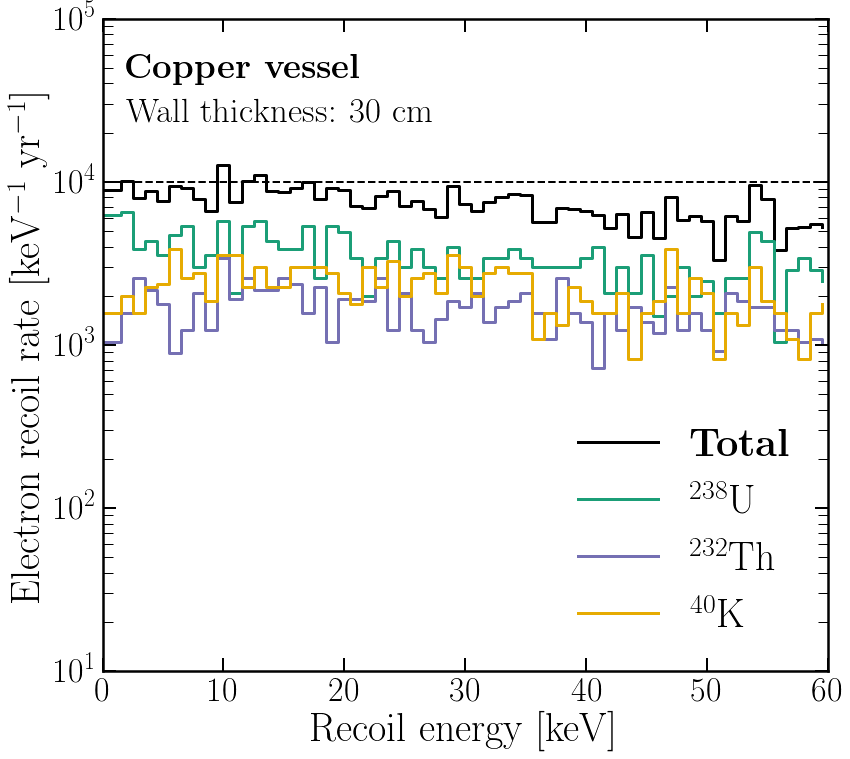

In [9]:
import matplotlib.cm as cm


fig,ax = MySquarePlot('Recoil energy [keV]','Electron recoil rate [keV$^{-1}$ yr$^{-1}$]',lfs=40,tfs=34)


col = cm.Dark2(linspace(0,1,4))
col1 = col[0,:]
col2 = col[1,:]
col3 = col[2,:]


dat1 = loadtxt('../backgrounds/CopperElectronRecoils1.txt',delimiter=',')
dat2 = loadtxt('../backgrounds/CopperElectronRecoils2.txt',delimiter=',')
dat3 = loadtxt('../backgrounds/CopperElectronRecoils3.txt',delimiter=',')

x = dat1[:,0]
y2 = interp(x,dat2[:,0],dat2[:,1])
y3 = interp(x,dat3[:,0],dat3[:,1])

#plt.plot(dat2[:,0],dat2[:,1],'-',lw=3,color=col2,label=r'$^{238}$U')
#plt.plot(dat3[:,0],dat3[:,1],'-',lw=3,color=col1,label=r'$^{232}$Th')
#plt.plot(dat1[:,0],dat1[:,1],'-',lw=3,color=col3,label=r'$^{40}$K')

dat1 = loadtxt('../backgrounds/Copper_U238.txt',delimiter=',')
dat2 = loadtxt('../backgrounds/Copper_Th232.txt',delimiter=',')
dat3 = loadtxt('../backgrounds/Copper_K40.txt',delimiter=',')

nbins = shape(dat1)[0]
dx = 60/(1.0*nbins)
x = linspace(dx/2.0,60-dx/2.0,nbins)
tot = dat1[:,1]+dat2[:,1]+dat3[:,1]
plt.step(append(0,x),append(tot[0],tot),lw=3,color='k',where='post',label=r'{\bf Total}')
plt.step(append(0,x),append(dat1[0,1],dat1[:,1]),lw=3,color=col1,where='post',label=r'$^{238}$U')
plt.step(append(0,x),append(dat2[0,1],dat2[:,1]),lw=3,color=col2,where='post',label=r'$^{232}$Th')
plt.step(append(0,x),append(dat3[0,1],dat3[:,1]),lw=3,color=col3,where='post',label=r'$^{40}$K')

plt.legend(fontsize=40,frameon=False,loc=4)

plt.yscale('log')

ax.set_ylim([1e1,1e5])
ax.set_xlim([0,60])

plt.plot([0,60],[1e4,1e4],'k--',lw=2)

plt.gcf().text(0.15,0.81,r'{\bf Copper vessel}',fontsize=35)
plt.gcf().text(0.15,0.76,r'Wall thickness: 30 cm',fontsize=35)

plt.show()

fig.savefig('../plots/Copper_electronrecoils.pdf',bbox_inches='tight')


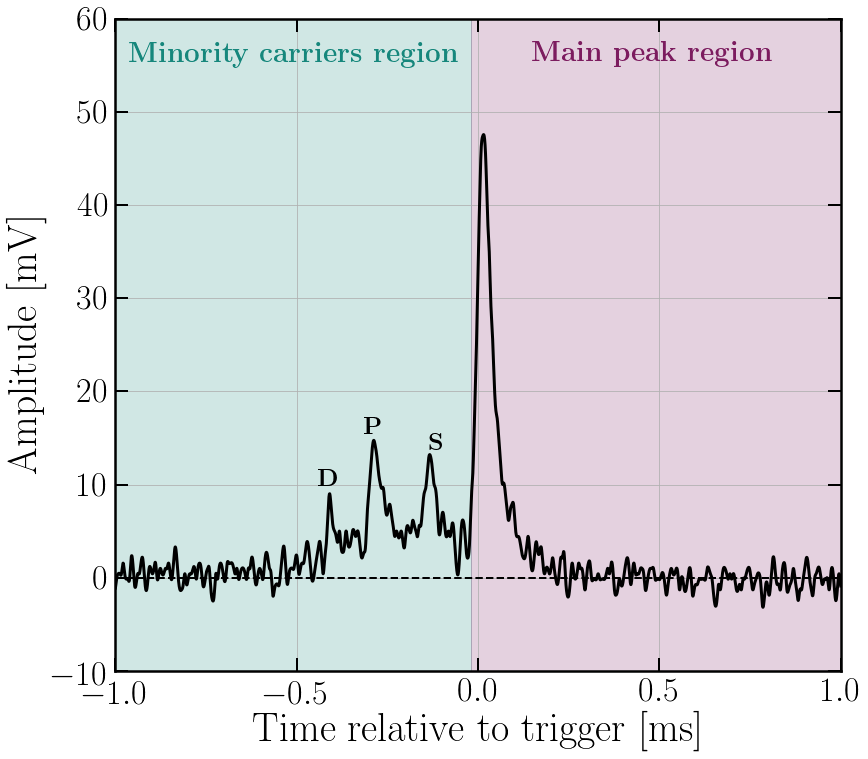

In [11]:
fig,ax = MySquarePlot('Time relative to trigger [ms]','Amplitude [mV]',lfs=40,tfs=34)

col = cmocean.cm.curl(linspace(0,1,10))
col1 = col[2,:]
col2 = col[8,:]

dat = loadtxt('../backgrounds/SF6_MinCar.txt',delimiter=',')

ymax = 60

plt.plot(dat[:,0]/1000.0,0.73*(dat[:,1]+13),'k-',lw=3)

plt.fill_between([-1,-0.02],[ymax,ymax],y2=-20,color=col1,alpha=0.2)
plt.fill_between([-0.02,1],[ymax,ymax],y2=-20,color=col2,alpha=0.2)

plt.plot([-1,1],[0,0],'k--',lw=2)

plt.gcf().text(0.14,0.83,r'{\bf Minority carriers region}',fontsize=28,color=col1)
plt.gcf().text(0.57,0.83,r'{\bf Main peak region}',fontsize=28,color=col2)

plt.gcf().text(0.34,0.34,r'{\bf D}',fontsize=25)
plt.gcf().text(0.39,0.4,r'{\bf P}',fontsize=25)
plt.gcf().text(0.46,0.38,r'{\bf S}',fontsize=25)

ax.grid()

ax.set_xlim([-1,1])
ax.set_ylim([-10,ymax])

plt.show()



fig.savefig('../plots/Drift_MinorityCarriers.pdf',bbox_inches='tight')


In [379]:
col

array([[0.0822556 , 0.11492441, 0.26479017, 1.        ],
       [0.08400523, 0.1231233 , 0.26896091, 1.        ]])

In [230]:
0.2/0.16

1.25